**Introduction**

As a Data Scientist, my job role isto explore the dataset and to answer business questions related to the data and to make predictions based the same dataset of the project which I a working for. For this I will be working on Google Colab and creating an Exploratory Data Analysis (EDA) Pipeline.
<br>
After successfull data cleaning and data exploration I will be answering a few Business questions and different inferences will be drawn using graphs, tables and some visual representations.



**Data Source**: Kaggle

**Link**: https://www.kaggle.com/datasets/arnabchaki/fitness-trackers-products-ecommerce

**Business Context** <br>
This is the dataset of Smartwatches of different brands which contains 450 datas for exploration. The Project that I am working for is a company called BeatXP, which is one of the popular brands of Fitness Tracker Products. Their major product is Smartwatches. As a part of their Business upscaling and innovation, the company is planning for launching a new series of Smartwatch models in the Indian business market, that can give very much importance to customer preferences. I will be using an EDA Pipeline in Google Colab to explore the data and to find answers to some of the business questions.
<br>
As a Data Scientist, BeatXP has hired me to find a the features that are commonly prefered by the Customers and answer some business questions that can help in the design of the new series of products. In additon, the company would like to upgrade the existing products that can contribute to the Business Profit, to be competent in the market and to find themselves in a dominating positon in the Smartwatch market.

For answering the business questions, we make use of the dataset collected from e-commerce websites: Amazon and Flipkart using web scrapping techniques.

The dataset contains the following features: <br>
1) Brand <br>
2) Current Price<br>
3) Original Price<br>
4) Discount Percentage<br>
5) Rating<br>
6) Number of Ratings<br>
7) Model Name<br>
8) Dial Shape<br>
9) Strap Color<br>
10) Strap Material<br>
11) Touchscreen<br>
12) Battery Life (Days)<br>
13) Bluetooth<br>
14) Display Size<br>
15) Weight<br>



**1) Data Loading and viewing the features**

In [ ]:
#Loaded dataset and obtained the features of dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('smartwatches[1].csv')
df.head(5)

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


After viewing the data, it is clear that there are some null values or missing values in some of the data features. Therefore, filling the null values is one of the crucials steps that needs to be done.

**2) Obtain Data description**

In [ ]:
#Obtain Data description

df.describe()

,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,450.000000,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,224.500000,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,130.048068,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,0.000000,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,112.250000,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,224.500000,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,336.750000,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,449.000000,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


**3) Find the featuers with missing and duplicated values**

In [ ]:
missing_values = df.isnull().sum() #Checking missing values
print(missing_values)

print()

duplicate_values = df.duplicated().sum() #Checking Duplicate values
print('The Duplicate values in the Dataset are',duplicate_values)

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

The Duplicate values in the Dataset are 0


From the above output we see that the missing values are found for the following features which requires filling: <br>

Original Price<br>
Discount Percentage<br>
Rating<br>
Number of Ratings<br>
Model Name<br>
Dial Shape<br>
Strap Color<br>
Strap Material<br>
Touchscreen<br>
Battery Life (Days)<br>
Bluetooth<br>
Display Size<br>
Weight<br>



**4) Filling the missing values** <br>

Null values are filled using the fillna function and also the values are obtained using mean, median and mode.

In [ ]:
#Filling Null values
#Current price and original
df['Current Price'].fillna(df['Current Price'].mean(), inplace=True)
df['Original Price'].fillna(df['Original Price'].median(), inplace=True)

df['Discount Percentage'] = (1 - df['Current Price'] / df['Original Price']) * 100
df['Discount Percentage'].fillna(0, inplace=True)  # Fill missing discounts with 0 if none

df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Number OF Ratings'].fillna(0, inplace=True)

df['Model Name'].fillna(method='ffill', inplace=True)
df['Dial Shape'].fillna(df['Dial Shape'].mode()[0], inplace=True)
df['Strap Color'].fillna(df['Strap Color'].mode()[0], inplace=True)
df['Strap Material'].fillna(df['Strap Material'].mode()[0], inplace=True)
df['Touchscreen'].fillna(df['Touchscreen'].mode()[0], inplace=True)
df['Bluetooth'].fillna(df['Bluetooth'].mode()[0], inplace=True)
df['Battery Life (Days)'].fillna(df['Battery Life (Days)'].mean(), inplace=True)

<ipython-input-5-f86b5cc0bc96>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Model Name'].fillna(method='ffill', inplace=True)


The feature 'Display size' contains values along with the unit (in Inches). Therefore we first convert this string into numeric values to fill the null values. So as a first step we remove the unit (inches) and maintain only the numerical value.

In [ ]:
#Modifying Display Size
#Remove the unit inches and then maintain only the numerical value
df['Display Size'] = df['Display Size'].str.replace('inches', '').str.strip()

# Display the updated 'Display Size' column
print(df['Display Size'].head())


0    NaN
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: object


Now the null values are now filled by obtaining the mean value.

In [ ]:
#Fill the null values for Display size

df['Display Size'] = pd.to_numeric(df['Display Size'], errors='coerce')
mean_display_size = df['Display Size'].mean() #Obtain mean value
df['Display Size'].fillna(mean_display_size, inplace=True) #Fill the null values with mean

Filling Null values for the feature 'Weight' has to be done in a series of steps. This is mainly due to the variations in the value. The value are the in following manner: i) Null values ii) Greater than a value iii) Less than or equal to a value iv) Values in a specific range.

In [ ]:
#Viewing the values available for the feature Weight
print(df['Weight'].head(10))

0    35 - 50 g
1    50 - 75 g
2    35 - 50 g
3        75g +
4    35 - 50 g
5    35 - 50 g
6    35 - 50 g
7    35 - 50 g
8    35 - 50 g
9    35 - 50 g
Name: Weight, dtype: object


In [ ]:
#Clean dataset for feature Weight

#Step 1: Remove the unit 'g' using the lambda function
df['Weight'] = df['Weight'].astype(str).apply(lambda x: x.replace('g', ''))


In [ ]:
#Step 2: Convert the values less than 20, values in a range and the values greater than 75

def weight_clean(value):
  value = str(value)
  if value.startswith('<='):
    return float(value[2:])  # Can subtract a small buffer if needed
  elif value.endswith('+'):
    return float(value[:-1])  # Can add an adjustment, e.g., + some buffer
  elif '-' in value:
    low, high = map(float, value.split('-'))
    return (low + high) / 2
  elif pd.isnull(value):
    return np.nan

df['Weight'] = df['Weight'].apply(weight_clean)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

In [ ]:
print(df['Weight'].head(10))


0    42.5
1    62.5
2    42.5
3    75.0
4    42.5
5    42.5
6    42.5
7    42.5
8    42.5
9    42.5
Name: Weight, dtype: float64


The values for the feature 'Weight' has been cleaned and the null values are filled.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0             0
Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
dtype: int64


Missing values for all the features are now filled. This is confirmed by checking the sum of all null values of features.

**Business Questions:**

---

**1) What are the top 5 brands with the best battery life Battery Life and what is the average battery life for each brand?**


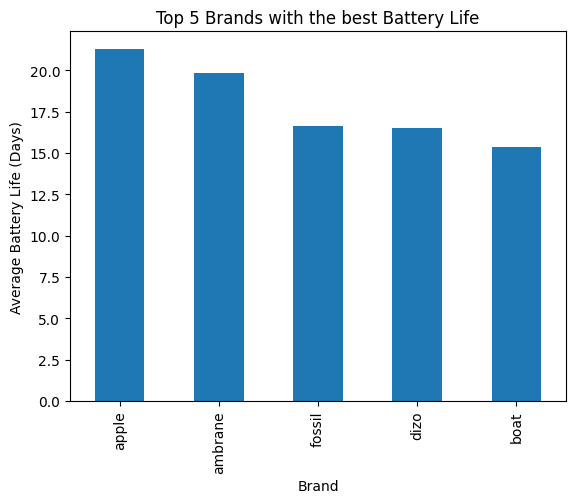

In [ ]:
# Group by 'Brand' and calculate the average battery life for each brand
best_battery_life = df.groupby('Brand')['Battery Life (Days)'].mean()

# Sort the brands by battery life in descending order and select the top 5
battery_top5 = best_battery_life.sort_values(ascending=False).head(5)


battery_top5.plot(kind='bar')
plt.title('Top 5 Brands with the best Battery Life')
plt.xlabel('Brand')
plt.ylabel('Average Battery Life (Days)')

plt.show()

**2) Are there any relation between Weight, Rating, Battery life and Price./ Which amongst the three features are the most considered when purchasing a smartwatch?**

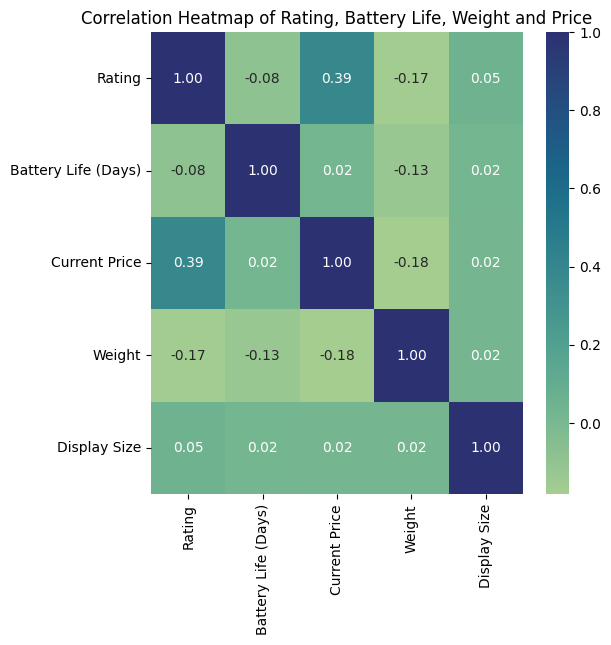

In [ ]:
#Setting features to find the correlation
df['Current Price'] = pd.to_numeric(df['Current Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Battery Life (Days)'] = pd.to_numeric(df['Battery Life (Days)'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Display Size'] = pd.to_numeric(df['Display Size'], errors='coerce')



# Create a dataframe with the four relevant features
df_features = df[['Rating', 'Battery Life (Days)', 'Current Price', 'Weight', 'Display Size']]

# Correlation matrix
correlation = df_features.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='crest', fmt='.2f')

#Correlation representation title
plt.title('Correlation Heatmap of Rating, Battery Life, Weight, Display Size and Price')
plt.show()


**3) Which is the most prefered Strap color and Strap material?**




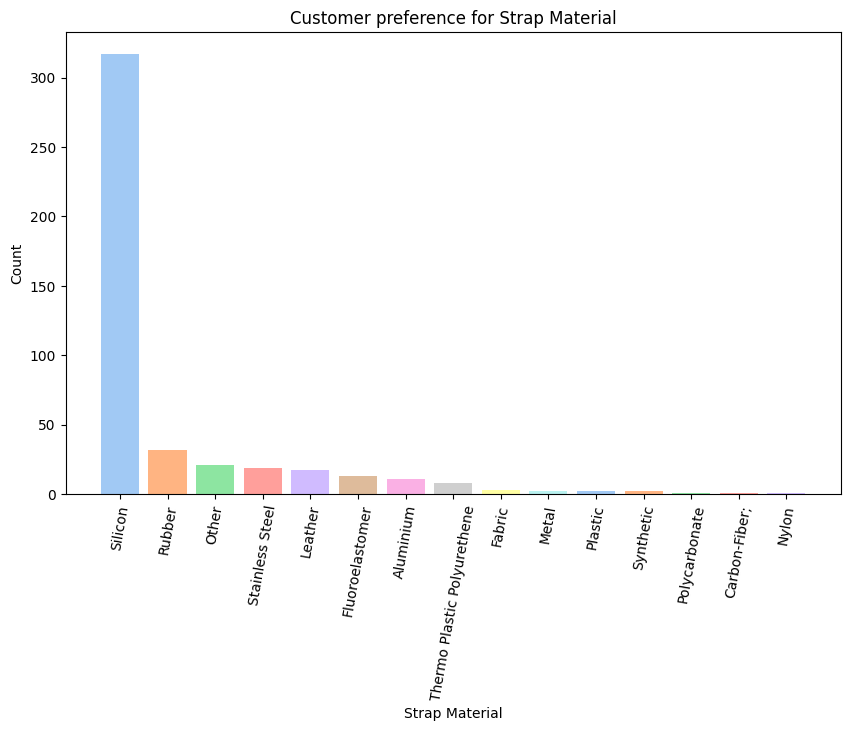

In [ ]:
strap_material = df['Strap Material'].value_counts()
strap_color = df['Strap Color'].value_counts()

# Bar chart for Strap Material
plt.figure(figsize=(10, 6))
plt.bar(strap_material.index, strap_material, color=sns.color_palette('pastel', len(strap_material)))
plt.title('Customer preference for Strap Material')
plt.xlabel('Strap Material')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()


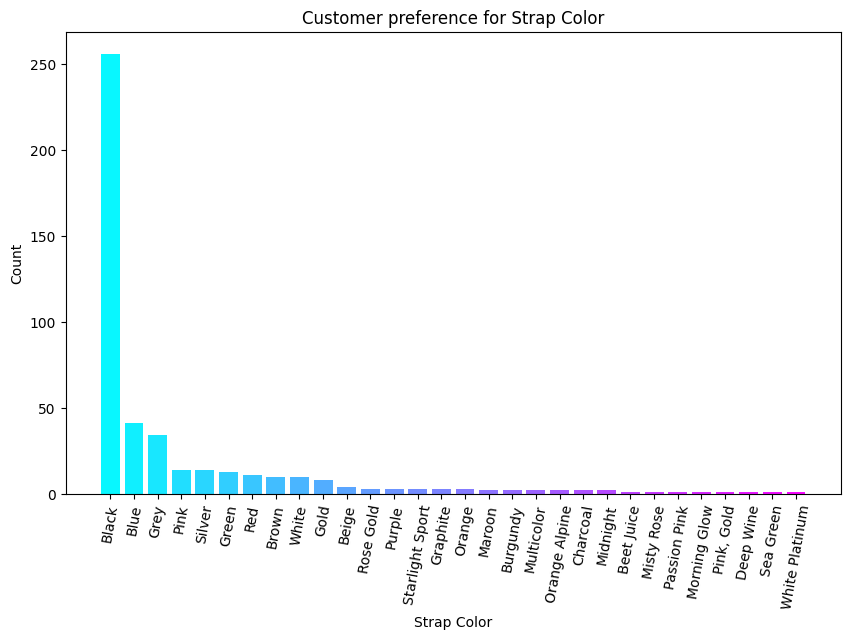

In [ ]:
# Bar chart for Strap Color
plt.figure(figsize=(10, 6))
plt.bar(strap_color.index, strap_color, color=sns.color_palette('cool', len(strap_color)))
plt.title('Customer preference for Strap Color')
plt.xlabel('Strap Color')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

**4) What is the rating of the top 10 Smartwatches with highest discount percentage?**

In [ ]:
from tabulate import tabulate

df_sorted = df.sort_values(by='Discount Percentage', ascending=False)
top10_discount = df_sorted.head(10)

top10_rating = top10_discount[['Discount Percentage', 'Rating', 'Brand', 'Model Name']]

print(tabulate(top10_rating, headers='keys', tablefmt='psql', showindex=False))

+-----------------------+----------+------------+--------------+
|   Discount Percentage |   Rating | Brand      | Model Name   |
|-----------------------+----------+------------+--------------|
|               91.0046 |      4.3 | fire-boltt | BSW053       |
|               88.3407 |      4.1 | fire-boltt | BSW037       |
|               87.0087 |      4.2 | fire-boltt | BSW030       |
|               86.8467 |      4.2 | fire-boltt | BSW073       |
|               85.0071 |      4.3 | fire-boltt | BSW100       |
|               83.7605 |      4.2 | fire-boltt | BSW030       |
|               82.8469 |      4   | boat       | Watch Flash  |
|               82.8469 |      4   | boat       | Watch Flash  |
|               82.8469 |      4   | boat       | Watch Flash  |
|               82.0082 |      4.2 | fire-boltt | BSW042       |
+-----------------------+----------+------------+--------------+


**5) Which models of Apple smartwatches offer the higest discount percentage?**





In [ ]:
apple_pdt = df[df['Brand'].str.lower() == 'apple']
max_discount = apple_pdt.sort_values(by='Discount Percentage', ascending=False).head(5)
apple_pdt_max_discount = max_discount[['Model Name','Discount Percentage']]

print(tabulate(apple_pdt_max_discount, headers='keys', tablefmt='psql', showindex=False))

+-------------------------------------------------------------------------------+-----------------------+
| Model Name                                                                    |   Discount Percentage |
|-------------------------------------------------------------------------------+-----------------------|
| Watch Series 3 (GPS, 42mm) - Silver Aluminium Case with White Sport Band      |              4.1841   |
| Watch Series7 (GPS + Cellular, 41mm)Blue Aluminium Case-Abyss Blue Sport Band |              2.42436  |
| Watch Series 3 (GPS, 42mm) - Space Grey Aluminium Case with Black Sport Band  |              2.30544  |
| Watch SE GPS (2nd Gen)                                                        |              0.83612  |
| Watch Series7 (GPS, 45mm) - Green Aluminium Case with Clover Sport Band       |              0.378619 |
+-------------------------------------------------------------------------------+-----------------------+


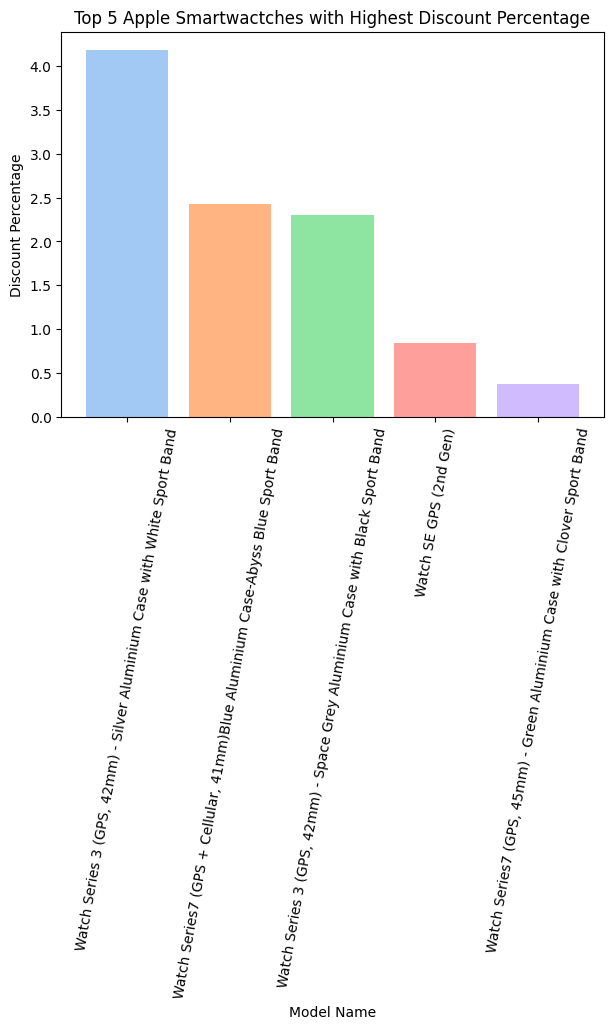

In [ ]:
#Plot for the apple products with highest Discount products
plt.figure(figsize=(7, 5))
plt.bar(apple_pdt_max_discount['Model Name'], apple_pdt_max_discount['Discount Percentage'], color=sns.color_palette('pastel', len(apple_pdt)))

plt.title('Top 5 Apple Smartwactches with Highest Discount Percentage')
plt.xlabel('Model Name')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=80)
plt.show()

**6)  What is the distribution of Dial Shape for the brand 'Noise'?**


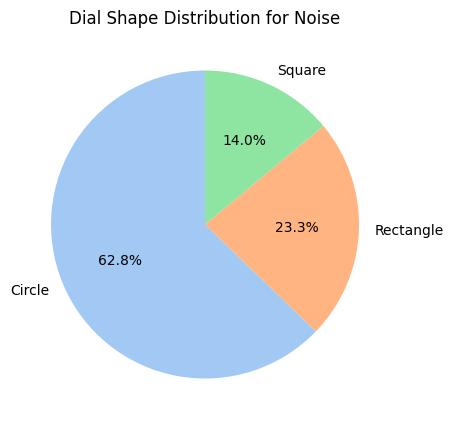

In [ ]:
noise_pdt = df[df['Brand'].str.lower() == 'noise']
dial_shape_noise = noise_pdt['Dial Shape'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(dial_shape_noise, labels=dial_shape_noise.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(dial_shape_noise)))
plt.title('Dial Shape Distribution for Noise')
plt.show()

**7) What are the top 10 models based on ratings and number of rating received?**

In [ ]:
min_rat = 100
filter_df = df[df['Number OF Ratings'] >= min_rat]

top10_rating = filter_df.sort_values(by='Rating', ascending=False).head(10)
top10_models = top10_rating[['Brand','Model Name', 'Current Price','Battery Life (Days)', 'Display Size', 'Weight']]

print(tabulate(top10_models, headers='keys', tablefmt='psql', showindex=False))

+---------+---------------------------------------------------------------------------------+-----------------+-----------------------+----------------+----------+
| Brand   | Model Name                                                                      |   Current Price |   Battery Life (Days) |   Display Size |   Weight |
|---------+---------------------------------------------------------------------------------+-----------------+-----------------------+----------------+----------|
| garmin  | Instinct 2, Rugged Outdoor Watch with GPS, Built for All Elements, Multi-GNSS   |           39490 |               17.5    |            0.9 |  43.7027 |
| garmin  | Instinct 2 Solar, Tactical Rugged SmartWatch, Multi GNSS, Tracback Routing      |           50490 |               17.5    |            0.9 |  43.7027 |
| fitbit  | Versa 4                                                                         |           20499 |               17.5    |            1.5 |  27.5    |
| huawei  | 7.54

**<u>Conclusion</u>**
<br> We have successfully applied the EDA pipeline on the dataset for Fitness Tracker Products (Smartwatches) in answering a few business questions and making some significant predictions like customer preferences in Battery life, Strap Color, Strap Material, Dial Shape, Display Size and more. This will give a idea for business innovation and design team in designing their future products and enhance their business thereby contrbuting to better customer satisfaction.

**<u>Findings and Recommendations</u>**

From this Data Science project, we have could draw the following inferences: <br> <br>
1) The top 5 brands that has the best Batter Life are: Apple, Ambrane, Fossil, Dizo and Boat - with Battery Life ranging from 15 - 20 days.

2) Customer rating and Price of the products have a correlational value of 0.39. This means that the more the price of the product, the more will be the customer rating, however this relationship is not very strong.

3) The most prefered Strap material is Silicon and the most prefered Strap Color is Black.

4) Fire Boltt and Boat are the brands with higher rating and highest Discount Percentage.

5) Smartwatches of Apple with highest discounts belong to the Wacthes in Series 3, 7 and SE.

6) The most common Dial Shape for 'Noise' brand is Circle, followed by Rectangle and Sqaure.

7) Some of the top rated Smartwatches which also has received a significantly higher number of ratings belong to the brands: garmin, fitbit and huawei. <br>
<br>
**<u>Limitations</u>**
<br>
The dataset we had received had a lot of null values, especially for some of the most important features such as rating, number of ratings, current price, discount percentage, model name. Also, some of the important features such as the 'Available Stock' and 'Sold' are missing. With these features more details like the most sold smartwatches, their features, price ranges, discount ranges could have been determined.

Although we fill the null values in the dataset using the fillna function, there could be variations from the actual data. For instance, the predicted data for features like Model Name, Dial Shape, Battery Life, Weight could vary from the actual data. If these features have a larger variations there could possibly also be a large variations in the results of business questions.
<br>


**<u>Recommendations</u>**
<br>
Based on the above inferences, BeatXP can come to the conclusion that Customer gives more importances to Battery Life of approximately 20 days. Also, the most common and prefered strap material is silicon and the most common color is black. However, Rubber and Stainless Steel are also some of the prefered materials for strap. In addition, customers seek for good discounts when purchasing a smartwatch.

Based on the above conclusions, BeatXP can design and launch a new series of smartwatches considering the customer preferences, such as Battery Life, Display Size, Weight, Strap Color, Strap material at a resonable Price and with better Discount rate.